# Result = 35%

# Default Setup

In [0]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 3.1MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [0]:
df = pd.read_csv(path_root + data_root + "AmazonAlexaReview/amazon_alexa.tsv", sep="\t")
text = df['verified_reviews'].to_list()
labels = df['rating'].astype(str).to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

## Work with Classifier

Training on '5':  80%|████████  | 4/5 [00:00<00:00, 28.47it/s]

 [ about to start training ]


Caching documents:   0%|          | 0/630 [00:00<?, ?it/s]

 [ finished --time: 0.4s ]
 [ about to start updating values... ]
 [ caching lv values ]
    [ lv values for 0 (1) ]
    [ lv values for 1 (2) ]
    [ lv values for 2 (3) ]
    [ lv values for 3 (4) ]
    [ lv values for 4 (5) ]
 [ caching sg values ]
    [ sg values for 0 (1) ]
    [ sg values for 1 (2) ]
    [ sg values for 2 (3) ]
    [ sg values for 3 (4) ]
    [ sg values for 4 (5) ]
[ caching gv values ]
    [ gv values for 0 (1) ]
    [ gv values for 1 (2) ]
    [ gv values for 2 (3) ]
    [ gv values for 3 (4) ]
    [ gv values for 4 (5) ]
 [ updating max gv values ]
    [ max gv values for 0 (1) ]
    [ max gv values for 1 (2) ]
    [ max gv values for 2 (3) ]
    [ max gv values for 3 (4) ]
    [ max gv values for 4 (5) ]
 [ max gv values have been updated ]
 [ caching confidence values (cvs) ]
    [ cvs for 0 (1) ]
    [ cvs for 1 (2) ]
    [ cvs for 2 (3) ]
    [ cvs for 3 (4) ]
    [ cvs for 4 (5) ]
 [ finished --time: 0.2s ]
[ loading evaluations from cache ]
[ no evaluat

Classification: 100%|██████████| 630/630 [00:00<00:00, 44368.52it/s]



              precision    recall  f1-score   support

           1       0.26      0.21      0.23        33
           2       0.16      0.29      0.21        21
           3       0.27      0.31      0.29        35
           4       0.24      0.19      0.21        85
           5       0.83      0.83      0.83       456

    accuracy                           0.67       630
   macro avg       0.35      0.37      0.35       630
weighted avg       0.66      0.67      0.66       630


 Accuracy: 0.665

[ updating evaluations cache ]


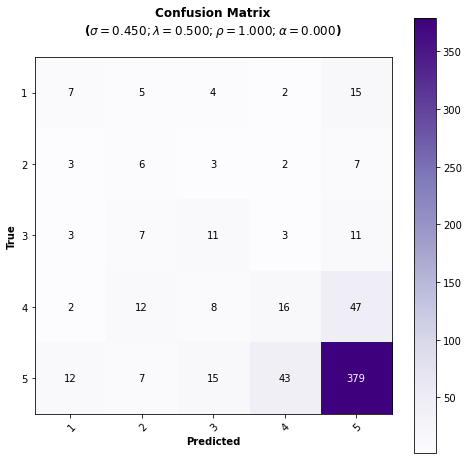

0.354007879923154

In [0]:
clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Make Binary Classifier

Training on 'positive':  50%|█████     | 1/2 [00:00<00:00, 10.77it/s]

 [ about to start training ]


Classification: 100%|██████████| 630/630 [00:00<00:00, 46532.80it/s]


 [ finished --time: 0.4s ]
 [ about to start updating values... ]
 [ caching lv values ]
    [ lv values for 0 (negative) ]
    [ lv values for 1 (positive) ]
 [ caching sg values ]
    [ sg values for 0 (negative) ]
    [ sg values for 1 (positive) ]
[ caching gv values ]
    [ gv values for 0 (negative) ]
    [ gv values for 1 (positive) ]
 [ updating max gv values ]
    [ max gv values for 0 (negative) ]
    [ max gv values for 1 (positive) ]
 [ max gv values have been updated ]
 [ caching confidence values (cvs) ]
    [ cvs for 0 (negative) ]
    [ cvs for 1 (positive) ]
 [ finished --time: 0.1s ]
[ loading evaluations from cache ]
[ no evaluation results found, creating a new empty cache ]
[ loading evaluations from cache ]
[ no evaluation results found, creating a new empty cache ]
 [ default category was automatically set to 'positive' (the most probable one) ]

              precision    recall  f1-score   support

    negative       0.51      0.80      0.62        84
    posit

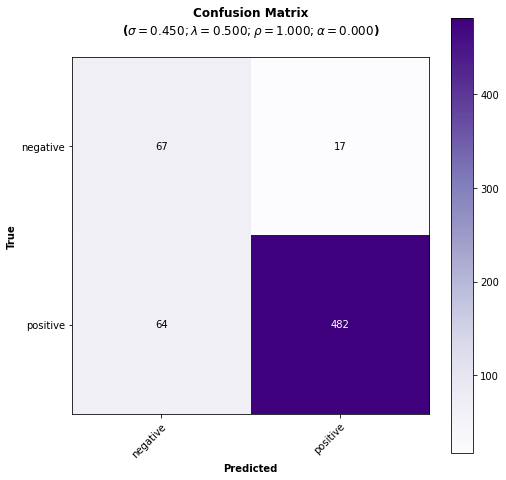

0.7728719261155003

In [0]:
new_labels = df['rating'].astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(text, new_labels, test_size=0.2)
clf = SS3()
clf.fit(X_train_2, y_train_2)
Evaluation.clear_cache()
Evaluation.test(clf, X_val_2, y_val_2, metric="f1-score")